
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '99101032'
first_name = 'Mohammad Taher'
last_name = 'Abadi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
# TODO: Write your code here

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [6]:
import pandas as pd

file_path = 'F:\Term8\ML\HWs\CHW4\Q2\spotify.csv'
spotify_data = pd.read_csv(file_path)

relevant_features = ['track_name', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_data = spotify_data[relevant_features]

print(spotify_relevant_data.head())


                                          track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0    -2.634       0.0583        0.1020          0.000000    0.0653    0.518   
1    -4.969       0.0373        0.0724          0.004210    0.3570    0.693   
2    -3.432       0.0742        0.0794          0.000023    0.1100    0.613   
3    -3.778       0.1020        0.0287          0.000009    0.2040    0.277   
4    -4.672       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [7]:
import pandas as pd

file_path = 'F:\Term8\ML\HWs\CHW4\Q2\spotify.csv'
spotify_data = pd.read_csv(file_path)

relevant_features = ['danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_data = spotify_data[relevant_features]

class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)

    def transform(self, data):
        return (data - self.means) / self.stds

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)


scaler = StandardScalerFromScratch()


spotify_scaled_data = scaler.fit_transform(spotify_relevant_data)

spotify_scaled_data = pd.DataFrame(spotify_scaled_data, columns=relevant_features)

print(spotify_scaled_data.head())


   danceability    energy  loudness  speechiness  acousticness  \
0      0.642039  1.201596  1.367103    -0.481355     -0.333893   
1      0.490404  0.643307  0.585758    -0.688631     -0.468663   
2      0.138887  1.284510  1.100073    -0.324417     -0.436792   
3      0.435264  1.278982  0.984294    -0.050023     -0.667632   
4     -0.033425  0.742804  0.685141    -0.702450     -0.432694   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.377947 -0.809217  0.031907  0.042926    -0.518866  
1         -0.359172  1.081044  0.782510 -0.777186    -1.056252  
2         -0.377843 -0.519554  0.439377  0.116225    -0.822004  
3         -0.377905  0.089580 -1.001780  0.039953    -0.947735  
4         -0.377947 -0.692574  0.919763  0.115035    -0.614163  


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

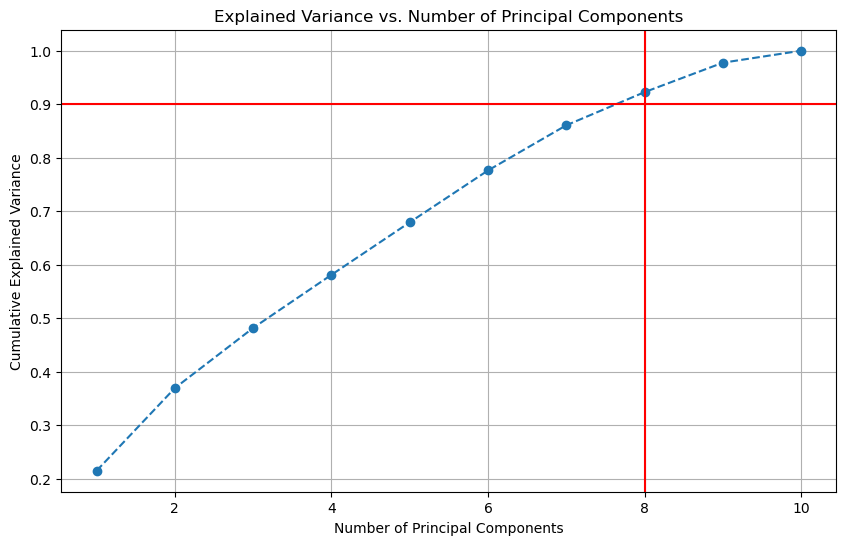

Number of principal components to retain: 8
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.550097 -0.655421 -0.456173 -1.101741 -0.564438 -0.257086 -0.227378   
1 -1.092450 -0.895198 -0.046981  0.322784 -0.347936 -1.453438  0.894883   
2 -1.630090 -0.614391 -0.086856 -0.938813 -0.553406 -0.265919  0.157524   
3 -1.598157 -0.062583  0.402634 -0.809606  0.038672 -0.866316 -0.590929   
4 -1.091239 -0.589492 -0.417262 -0.813601 -0.875693  0.027527  0.533583   

        PC8  
0  0.200872  
1 -0.417737  
2  0.243097  
3 -0.422616  
4  0.095084  


In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'F:\Term8\ML\HWs\CHW4\Q2\spotify.csv'
spotify_data = pd.read_csv(file_path)

relevant_features = ['danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_data = spotify_data[relevant_features]

spotify_numeric_data = spotify_relevant_data.apply(pd.to_numeric, errors='coerce')

spotify_numeric_data = spotify_numeric_data.fillna(spotify_numeric_data.mean())

class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)

    def transform(self, data):
        return (data - self.means) / self.stds

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

scaler = StandardScalerFromScratch()

spotify_scaled_data = scaler.fit_transform(spotify_numeric_data)

spotify_scaled_data = pd.DataFrame(spotify_scaled_data, columns=spotify_numeric_data.columns)

pca = PCA()

pca.fit(spotify_scaled_data)

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=(cumulative_explained_variance >= 0.90).argmax() + 1, color='r', linestyle='-')
plt.grid(True)
plt.show()

n_components = (cumulative_explained_variance >= 0.90).argmax() + 1
print(f'Number of principal components to retain: {n_components}')

pca = PCA(n_components=n_components)
spotify_pca_data = pca.fit_transform(spotify_scaled_data)

spotify_pca_df = pd.DataFrame(spotify_pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

print(spotify_pca_df.head())


# Clustering

Implement K-means for clustering from scratch.

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.550097 -0.655421 -0.456173 -1.101741 -0.564438 -0.257086 -0.227378   
1 -1.092450 -0.895198 -0.046981  0.322784 -0.347936 -1.453438  0.894883   
2 -1.630090 -0.614391 -0.086856 -0.938813 -0.553406 -0.265919  0.157524   
3 -1.598157 -0.062583  0.402634 -0.809606  0.038672 -0.866316 -0.590929   
4 -1.091239 -0.589492 -0.417262 -0.813601 -0.875693  0.027527  0.533583   

        PC8  Cluster  
0  0.200872        2  
1 -0.417737        2  
2  0.243097        2  
3 -0.422616        0  
4  0.095084        2  


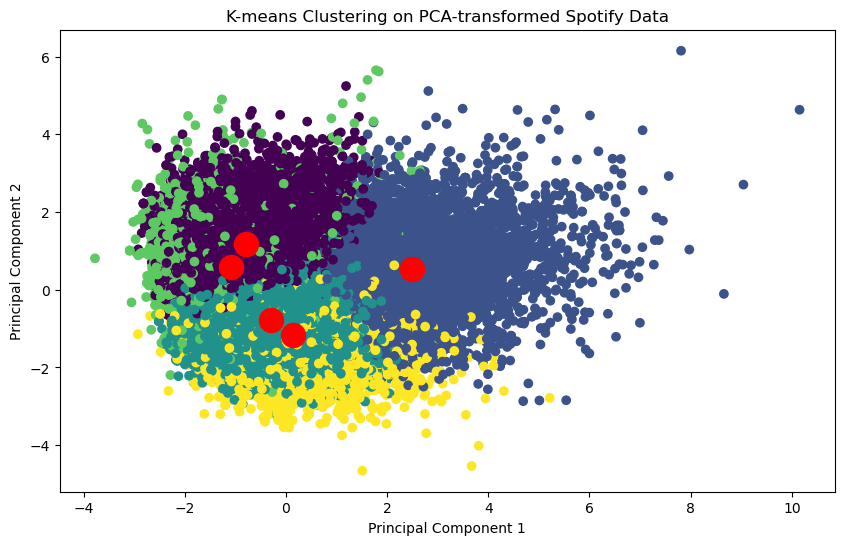

In [11]:
import numpy as np
import pandas as pd

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, data):
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.n_clusters]]

        for i in range(self.max_iters):
            self.labels = self._assign_labels(data)

            
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def predict(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

data = spotify_pca_df.values

kmeans = KMeansFromScratch(n_clusters=5)
kmeans.fit(data)

spotify_pca_df['Cluster'] = kmeans.predict(data)

print(spotify_pca_df.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=spotify_pca_df['Cluster'], cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Spotify Data')
plt.show()


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

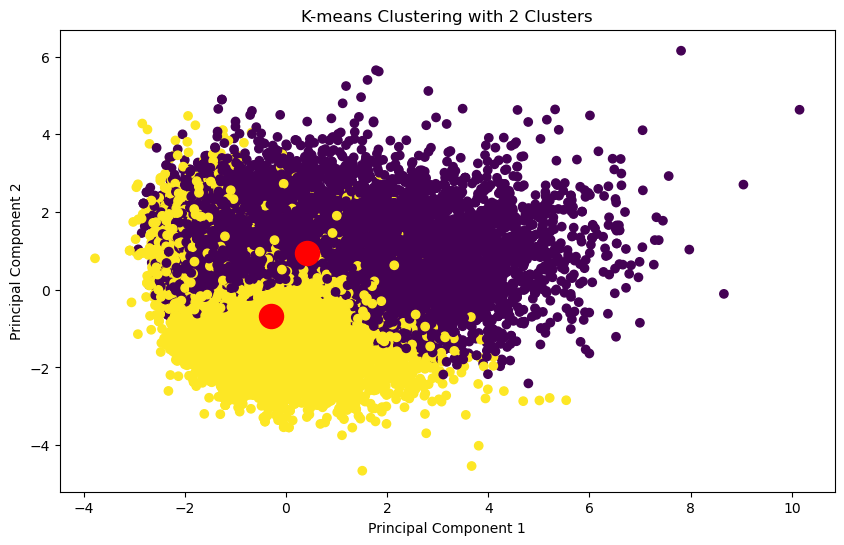

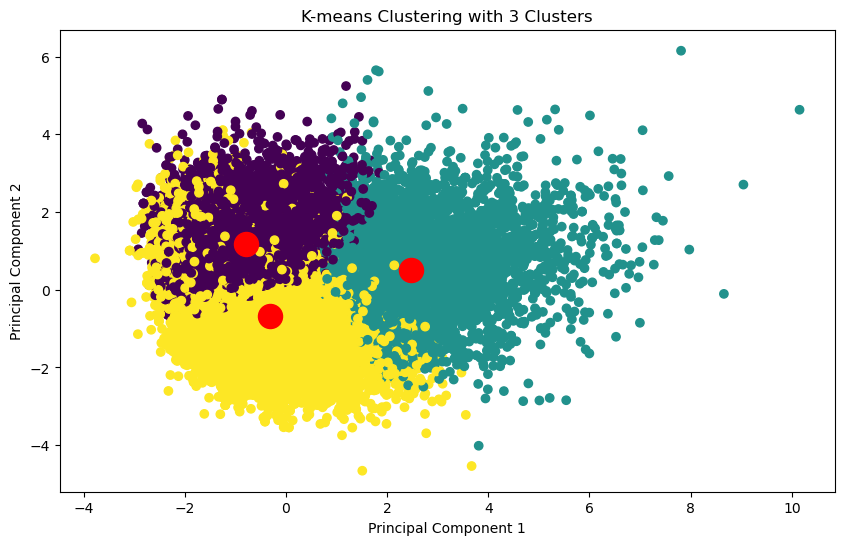

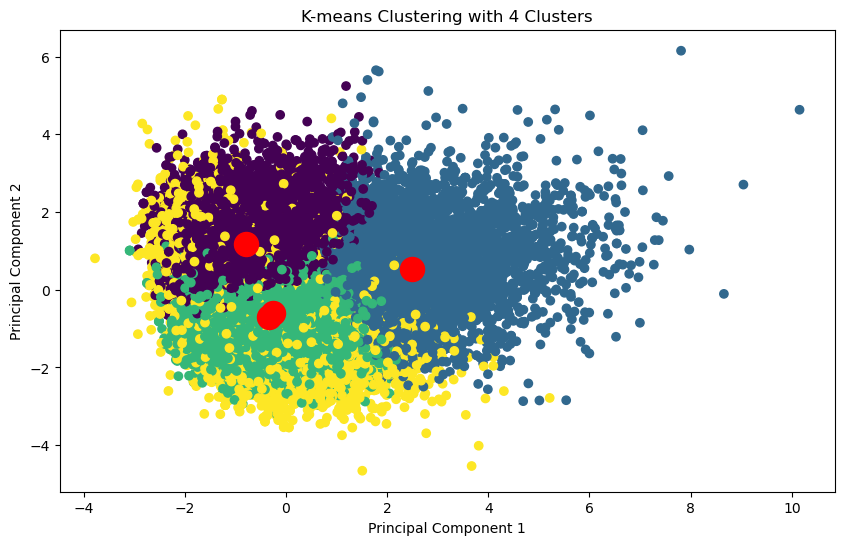

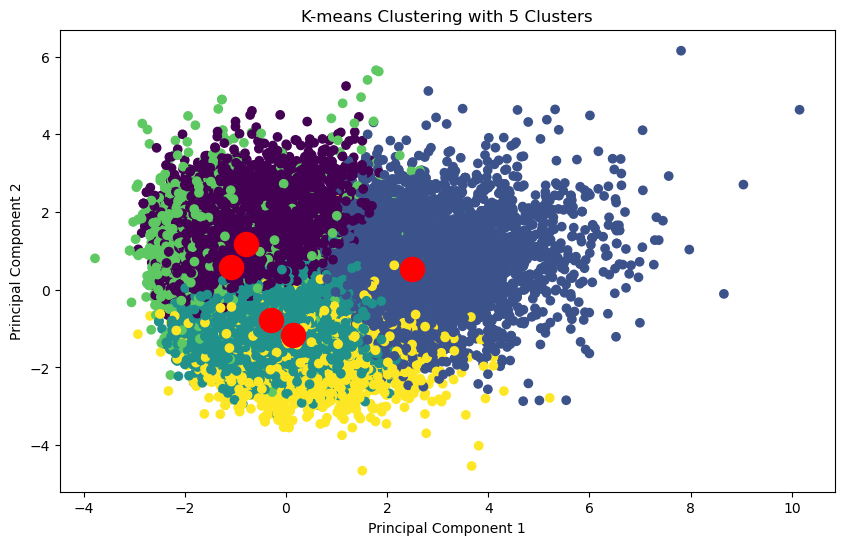

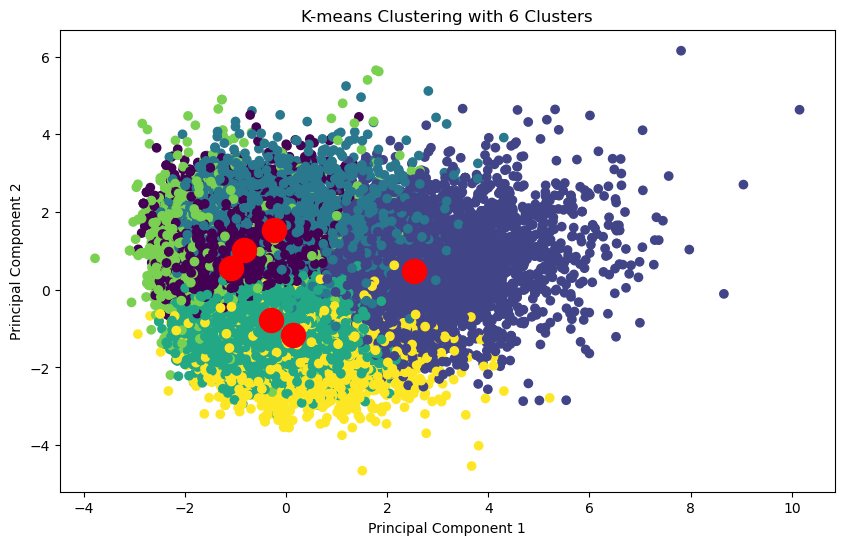

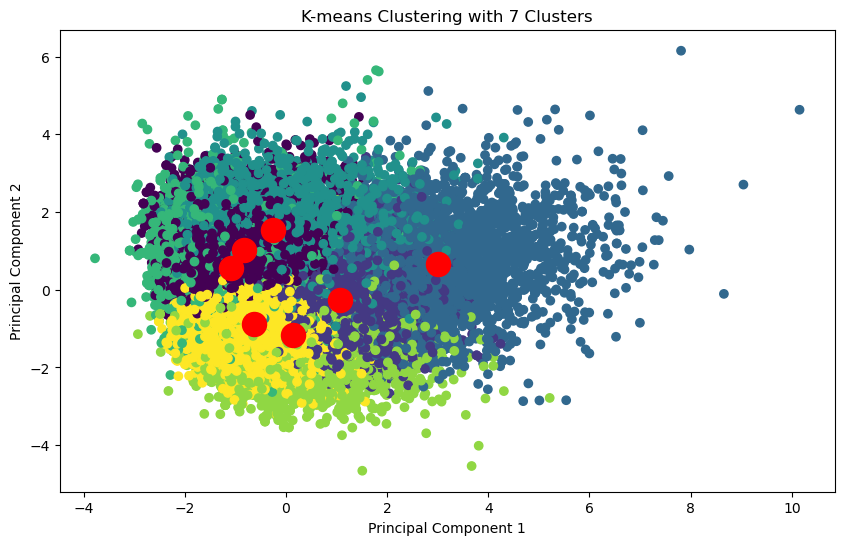

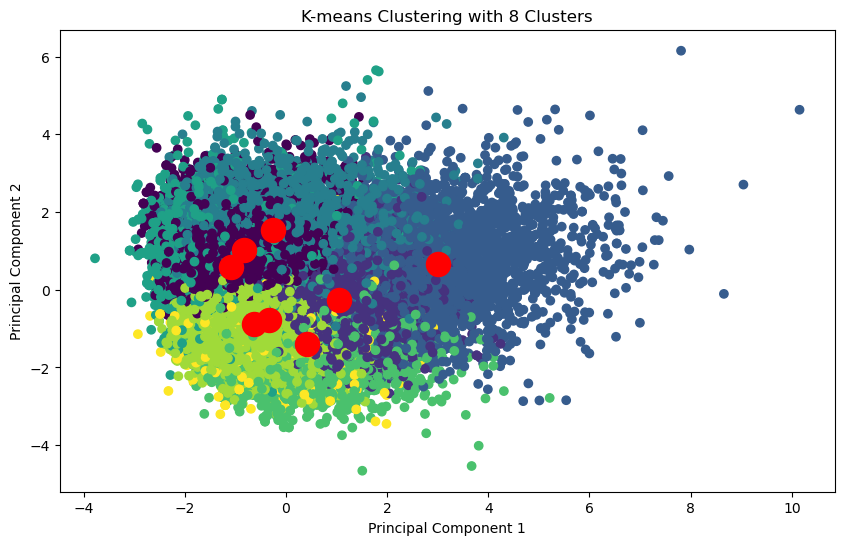

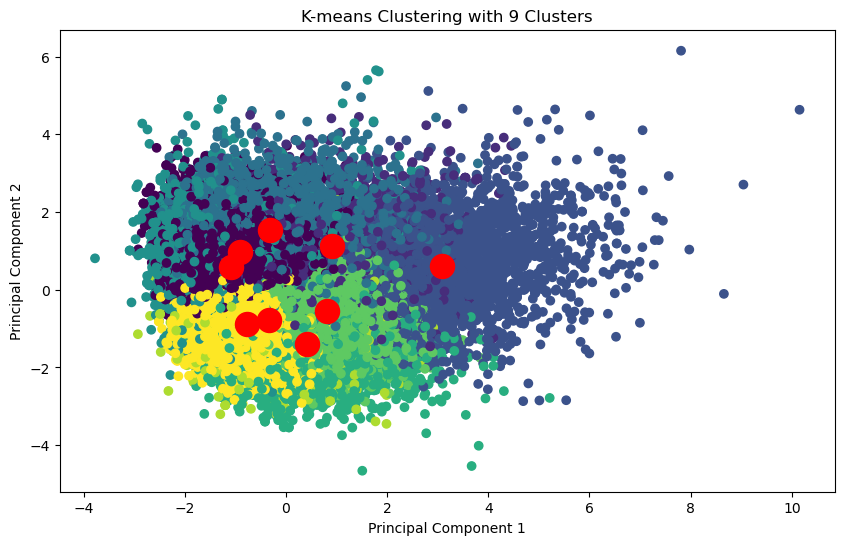

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, data):
        
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.n_clusters]]

        for i in range(self.max_iters):
            
            self.labels = self._assign_labels(data)

            
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def predict(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

data = spotify_pca_df.values

for n_clusters in range(2, 10):
    
    kmeans = KMeansFromScratch(n_clusters=n_clusters)
    kmeans.fit(data)

    
    spotify_pca_df['Cluster'] = kmeans.predict(data)

    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=spotify_pca_df['Cluster'], cmap='viridis')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

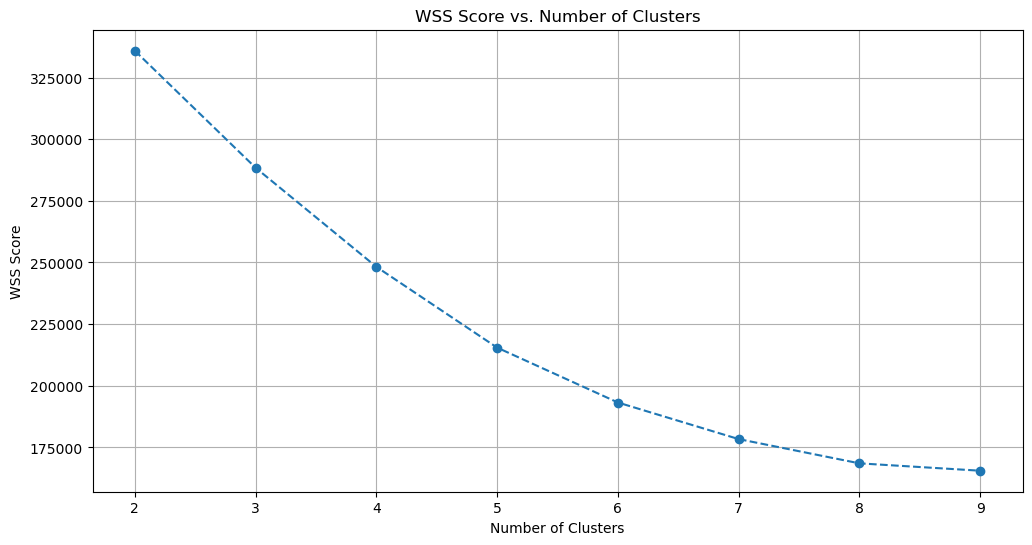

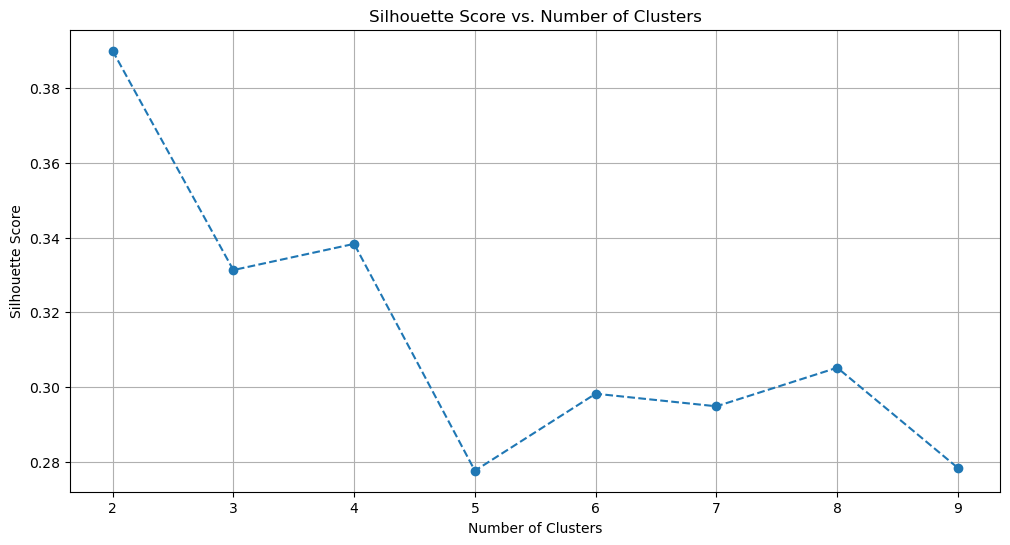

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, data):
        
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.n_clusters]]

        for i in range(self.max_iters):
            
            self.labels = self._assign_labels(data)

            
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def predict(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def calculate_wss(self, data):
        wss = 0
        for i in range(self.n_clusters):
            cluster_points = data[self.labels == i]
            wss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wss

    def calculate_silhouette_score(self, data):
        from sklearn.metrics import silhouette_samples

        silhouette_vals = silhouette_samples(data, self.labels)
        return np.mean(silhouette_vals)

data = spotify_pca_df.values

wss_scores = []
silhouette_scores = []

for n_clusters in range(2, 10):
    
    kmeans = KMeansFromScratch(n_clusters=n_clusters)
    kmeans.fit(data)

    
    spotify_pca_df['Cluster'] = kmeans.predict(data)

    
    wss_scores.append(kmeans.calculate_wss(data))
    silhouette_scores.append(kmeans.calculate_silhouette_score(data))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.title('WSS Score vs. Number of Clusters')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

Cluster 0: Distance between two random songs = 3.658882716126216
Cluster 1: Distance between two random songs = 2.2406059726527205
Cluster 2: Distance between two random songs = 2.473045993084181
Cluster 3: Distance between two random songs = 2.9385487564182724
Cluster 4: Distance between two random songs = 2.1646730146797344


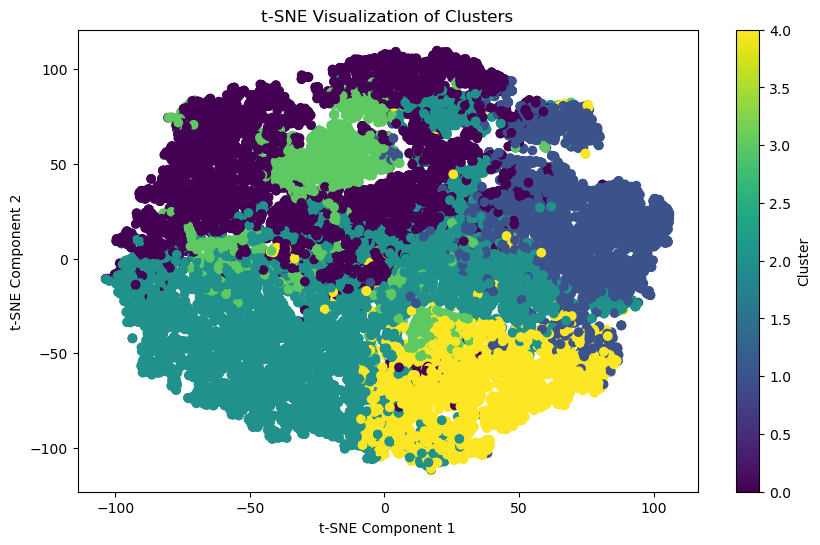

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

file_path = 'F:\Term8\ML\HWs\CHW4\Q2\spotify.csv'
spotify_data = pd.read_csv(file_path)

relevant_features = ['danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_data = spotify_data[relevant_features]

spotify_numeric_data = spotify_relevant_data.apply(pd.to_numeric, errors='coerce')

spotify_numeric_data = spotify_numeric_data.fillna(spotify_numeric_data.mean())

class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)

    def transform(self, data):
        return (data - self.means) / self.stds

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)


scaler = StandardScalerFromScratch()


spotify_scaled_data = scaler.fit_transform(spotify_numeric_data)


spotify_scaled_data = pd.DataFrame(spotify_scaled_data, columns=spotify_numeric_data.columns)


pca = PCA(n_components=7)  
spotify_pca_data = pca.fit_transform(spotify_scaled_data)


spotify_pca_df = pd.DataFrame(spotify_pca_data, columns=[f'PC{i+1}' for i in range(7)])

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)


class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, data):
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.n_clusters]]

        for i in range(self.max_iters):
            self.labels = self._assign_labels(data)

            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def predict(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)


n_clusters = 5
kmeans = KMeansFromScratch(n_clusters=n_clusters)
kmeans.fit(spotify_pca_df.values)


spotify_pca_df['Cluster'] = kmeans.predict(spotify_pca_df.values)


for cluster in range(n_clusters):
    cluster_data = spotify_pca_df[spotify_pca_df['Cluster'] == cluster]
    if len(cluster_data) < 2:
        continue
    sample_songs = cluster_data.sample(2, random_state=42)
    song1, song2 = sample_songs.iloc[0], sample_songs.iloc[1]
    distance = euclidean_distance(song1[:-1], song2[:-1])  
    print(f'Cluster {cluster}: Distance between two random songs = {distance}')

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(spotify_pca_df.iloc[:, :-1])  

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=spotify_pca_df['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

Cluster 0: Distance between two random songs = 3.658882716126216
Cluster 1: Distance between two random songs = 2.2406059726527205
Cluster 2: Distance between two random songs = 2.473045993084181
Cluster 3: Distance between two random songs = 2.9385487564182724
Cluster 4: Distance between two random songs = 2.1646730146797344


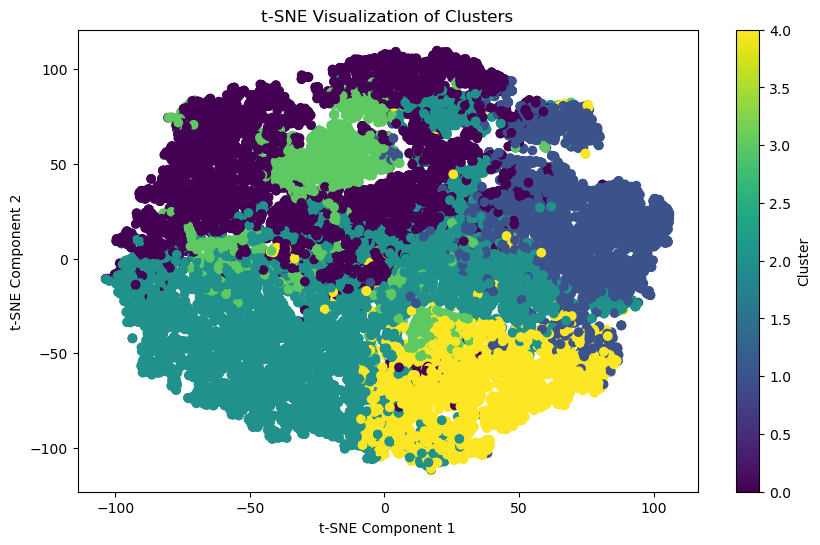

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

file_path = 'F:\Term8\ML\HWs\CHW4\Q2\spotify.csv'
spotify_data = pd.read_csv(file_path)

relevant_features = ['danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_data = spotify_data[relevant_features]


spotify_numeric_data = spotify_relevant_data.apply(pd.to_numeric, errors='coerce')


spotify_numeric_data = spotify_numeric_data.fillna(spotify_numeric_data.mean())


class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)

    def transform(self, data):
        return (data - self.means) / self.stds

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)


scaler = StandardScalerFromScratch()


spotify_scaled_data = scaler.fit_transform(spotify_numeric_data)


spotify_scaled_data = pd.DataFrame(spotify_scaled_data, columns=spotify_numeric_data.columns)


pca = PCA(n_components=7)  
spotify_pca_data = pca.fit_transform(spotify_scaled_data)


spotify_pca_df = pd.DataFrame(spotify_pca_data, columns=[f'PC{i+1}' for i in range(7)])


def euclidean_distance(a, b):
    return np.linalg.norm(a - b)


class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, data):
        
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.n_clusters]]

        for i in range(self.max_iters):
            self.labels = self._assign_labels(data)

            
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def predict(self, data):
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

n_clusters = 5
kmeans = KMeansFromScratch(n_clusters=n_clusters)
kmeans.fit(spotify_pca_df.values)


spotify_pca_df['Cluster'] = kmeans.predict(spotify_pca_df.values)

for cluster in range(n_clusters):
    cluster_data = spotify_pca_df[spotify_pca_df['Cluster'] == cluster]
    if len(cluster_data) < 2:
        continue
    sample_songs = cluster_data.sample(2, random_state=42)
    song1, song2 = sample_songs.iloc[0], sample_songs.iloc[1]
    distance = euclidean_distance(song1[:-1], song2[:-1])  
    print(f'Cluster {cluster}: Distance between two random songs = {distance}')


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(spotify_pca_df.iloc[:, :-1])  

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=spotify_pca_df['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()
